In [17]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv('store_unified_summary.csv', encoding='utf-8-sig')

In [19]:
# 1. 제외할 컬럼 정의
exclude_cols = [
    "store_id", "owner_id",
    "open_date", "summary_year_month", "created_dttm", "updated_dttm", "last_updated_dttm",
    "participate_energy_eff_support", "participate_high_eff_equip_support",
    "yellow_umbrella_member", "hygiene_certified"
]

# 2. 연속형 숫자형 컬럼만 선택 (INT, FLOAT/DECIMAL)
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 3. 제외 컬럼 제거 후 잡음 대상 컬럼만 추출
target_cols = [col for col in numeric_cols if col not in exclude_cols]

# 4. 잡음 추가 함수 정의
def add_noise(series, noise_level=0.01):
    """series 값에 표준편차 기반 랜덤 잡음 추가"""
    std = series.std()
    noise = np.random.normal(0, noise_level * std, size=series.shape)
    return series + noise

# 5. 잡음 추가 적용
data_noisy = data.copy()
data_noisy[target_cols] = data_noisy[target_cols].apply(lambda col: add_noise(col, noise_level=0.01))

In [21]:
pd.set_option('display.max_columns', None)
data_noisy.head()

,store_id,owner_id,business_registration_no,industry_code,open_date,summary_year_month,total_sales_amount,weekday_sales_amount,weekend_sales_amount,lunch_sales_ratio,dinner_sales_ratio,transaction_count,weekday_transaction_count,weekend_transaction_count,mom_growth_rate,yoy_growth_rate,sales_cv,avg_transaction_value,weekday_avg_transaction_value,weekend_avg_transaction_value,cash_payment_ratio,card_payment_ratio,revisit_customer_sales_ratio,new_customer_ratio,created_dttm,updated_dttm,last_updated_dttm,electricity_usage_kwh,electricity_bill_amount,gas_usage_m3,water_usage_ton,energy_eff_appliance_ratio,participate_energy_eff_support,participate_high_eff_equip_support,food_waste_kg_per_day,recycle_waste_kg_per_day,yellow_umbrella_member,yellow_umbrella_months,yellow_umbrella_amount,employment_insurance_employees,customer_review_avg_rating,customer_review_positive_ratio,hygiene_certified,origin_price_violation_count,operating_profit,cost_of_goods_sold,total_salary,operating_expenses,rent_expense,other_expenses,operating_profit_ratio,cogs_ratio,salary_ratio,rent_ratio,operating_expense_ratio,cash_payment_ratio_detail,card_payment_ratio_detail,other_payment_ratio,weighted_avg_cash_period,cashflow_cv,avg_account_balance,min_balance_maintenance_ratio,excessive_withdrawal_frequency,rent_payment_compliance_rate,utility_payment_compliance_rate,salary_payment_regularity,tax_payment_integrity
0,101,1101,101-74-60399,56111.993093,2024-11-04,2024-11,2.404973e+06,1.131773e+06,1.298389e+06,31.819967,26.952024,203.333269,112.153193,64.696987,1.218187,NaN,0.141777,16310.286152,15257.050165,17982.364132,15.673407,84.270972,40.149422,53.769476,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,862.074273,110049.701780,499.335163,9.166522,36.084359,0,0,6.625257,5.279214,0,0.199634,-2076.619303,-0.006204,3.901364,50.495465,0,-0.003420,332508.228219,1.241823e+06,414548.256124,2.356512e+06,352715.794958,296512.882068,14.295820,48.468389,15.487706,11.242265,85.677921,53.139060,44.565975,2.184668,1.219949,0.387071,1.441001e+06,60.207209,2.801432,61.920979,72.587466,59.842753,68.745394
1,101,1101,101-80-14374,56111.555443,2024-11-04,2024-12,3.176345e+06,1.404193e+06,1.317031e+06,24.623960,26.459397,183.017131,101.044824,94.056386,13.840425,NaN,0.165750,16651.226087,15733.707647,18906.602949,19.261028,80.620871,50.657258,69.953030,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,1126.791037,128876.926721,692.484839,8.562346,39.438804,0,0,8.214562,9.996750,0,-0.345965,-25.569772,0.012888,3.782740,59.463483,0,0.007010,426091.697644,1.602062e+06,591864.891988,2.878373e+06,321387.837756,282176.501143,12.666139,51.739588,17.227148,10.285105,87.338232,64.308041,33.173943,2.504764,0.962952,0.505667,2.626276e+06,42.259630,1.963383,78.020866,46.112041,55.076644,72.756656
2,101,1101,101-90-34754,56112.362149,2024-11-04,2025-01,3.440357e+06,1.774949e+06,1.756881e+06,20.581308,26.377907,203.323831,104.996115,71.188302,12.202787,NaN,0.148410,18701.631833,17479.209484,21013.884969,15.828415,84.137104,51.074242,63.202427,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,1079.771029,130610.505488,745.789153,8.263626,60.802072,0,0,6.752846,6.038821,0,-0.684716,191.991624,0.004047,3.866671,57.421137,0,-0.002626,517543.610688,1.635835e+06,522999.984402,3.353573e+06,393776.138386,381696.833586,15.435772,48.211129,15.265172,11.000842,84.582630,63.195904,32.600241,4.007190,1.022150,0.575705,2.189400e+06,38.228443,1.028349,68.033571,62.044528,75.695193,89.142396
3,101,1101,101-04-50959,56113.065735,2024-11-04,2025-02,4.186773e+06,2.214435e+06,1.897210e+06,26.198374,33.772638,240.439356,123.826177,78.386915,13.332277,NaN,0.172465,20752.685099,19389.472816,23110.292021,18.480224,81.532294,49.848529,60.244240,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,924.826479,105558.145792,632.640428,8.033220,37.489617,0,0,5.614000,6.313057,0,0.313930,1233.804897,-0.003048,3.254888,51.431534,0,0.003337,572159.874626,1.788924e+06,705620.393136,3.6

In [24]:
# ==============================
# 패키지 불러오기
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# ==============================
# 1. 스케일링
# ==============================
# R: X_df <- df[, 11:18]; X_df <- X_df[, -1]
data_noisy2 = data_noisy.drop(data_noisy.columns[[0, 1]], axis=1)

# 1. 숫자형 컬럼만 선택
numeric_cols = data_noisy2.select_dtypes(include=["int64", "float64"]).columns

# exclude_cols 제거
target_cols = [col for col in numeric_cols if col not in exclude_cols]

# 표준화 수행
scaler = StandardScaler()
standardized_X = pd.DataFrame(
    scaler.fit_transform(data_noisy[target_cols]),
    columns=target_cols
)

# 원본 데이터에 반영하고 싶으면
data_standardized = data_noisy.copy()
data_standardized[target_cols] = standardized_X

In [25]:
data_standardized

,store_id,owner_id,business_registration_no,industry_code,open_date,summary_year_month,total_sales_amount,weekday_sales_amount,weekend_sales_amount,lunch_sales_ratio,dinner_sales_ratio,transaction_count,weekday_transaction_count,weekend_transaction_count,mom_growth_rate,yoy_growth_rate,sales_cv,avg_transaction_value,weekday_avg_transaction_value,weekend_avg_transaction_value,cash_payment_ratio,card_payment_ratio,revisit_customer_sales_ratio,new_customer_ratio,created_dttm,updated_dttm,last_updated_dttm,electricity_usage_kwh,electricity_bill_amount,gas_usage_m3,water_usage_ton,energy_eff_appliance_ratio,participate_energy_eff_support,participate_high_eff_equip_support,food_waste_kg_per_day,recycle_waste_kg_per_day,yellow_umbrella_member,yellow_umbrella_months,yellow_umbrella_amount,employment_insurance_employees,customer_review_avg_rating,customer_review_positive_ratio,hygiene_certified,origin_price_violation_count,operating_profit,cost_of_goods_sold,total_salary,operating_expenses,rent_expense,other_expenses,operating_profit_ratio,cogs_ratio,salary_ratio,rent_ratio,operating_expense_ratio,cash_payment_ratio_detail,card_payment_ratio_detail,other_payment_ratio,weighted_avg_cash_period,cashflow_cv,avg_account_balance,min_balance_maintenance_ratio,excessive_withdrawal_frequency,rent_payment_compliance_rate,utility_payment_compliance_rate,salary_payment_regularity,tax_payment_integrity
0,101,1101,101-74-60399,-0.507882,2024-11-04,2024-11,-0.600556,-0.622042,-0.548760,0.400338,-0.164509,-0.610934,-0.650638,-0.573151,0.226974,NaN,0.180537,-0.007171,-0.019422,-0.043963,-0.759378,0.752727,-1.382474,0.330795,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,-1.213170,-1.133298,-0.410836,-1.456731,-1.428928,0,0,-0.791805,-0.938356,0,-0.471560,-0.663232,-0.466803,-0.082278,-0.708574,0,-0.283871,-0.586046,-0.591552,-0.600263,-0.588541,-0.569291,-0.576568,-0.715606,0.383909,-0.721223,0.959880,0.708579,-0.368048,0.456386,-1.344452,0.224030,-0.813789,-0.564833,-0.140730,0.216581,-0.944368,0.077524,-0.616184,-0.891818
1,101,1101,101-80-14374,-0.518093,2024-11-04,2024-12,-0.573521,-0.606796,-0.547052,-0.526763,-0.213160,-0.621271,-0.660316,-0.538141,3.453290,NaN,0.556146,0.041696,0.053296,0.074316,-0.404121,0.391225,-0.599513,1.508854,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,-0.879749,-0.938010,0.100914,-1.525425,-1.204077,0,0,-0.521799,-0.122459,0,-0.487113,-0.651733,-0.444231,-0.326603,0.088604,0,-0.266394,-0.569785,-0.564760,-0.561481,-0.565759,-0.580627,-0.583154,-1.074764,1.651927,0.455786,0.117006,1.074352,1.187855,-1.115031,-0.792148,-1.211248,-0.365913,-0.521194,-1.066457,-0.170795,0.129341,-1.628091,-0.911326,-0.542297
2,101,1101,101-90-34754,-0.499272,2024-11-04,2025-01,-0.564267,-0.586046,-0.506753,-1.047600,-0.221208,-0.610939,-0.656873,-0.565411,3.034701,NaN,0.284458,0.335584,0.319588,0.343992,-0.744029,0.739469,-0.568443,1.017453,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,-0.938972,-0.920028,0.242143,-1.559389,0.227923,0,0,-0.770129,-0.806983,0,-0.496770,-0.650513,-0.454684,-0.153734,-0.092943,0,-0.282540,-0.553895,-0.562248,-0.576543,-0.545014,-0.554432,-0.537435,-0.464376,0.284187,-0.871802,0.747283,0.467282,1.032928,-1.194167,1.800194,-0.880642,-0.101416,-0.537279,-1.274383,-0.603001,-0.536716,-0.601679,0.365481,0.885474
3,101,1101,101-04-50959,-0.482857,2024-11-04,2025-02,-0.538106,-0.561450,-0.493896,-0.323923,0.509083,-0.592054,-0.640468,-0.556826,3.323405,NaN,0.661355,0.629566,0.611015,0.612276,-0.481439,0.481491,-0.659773,0.802116,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,-1.134131,-1.179888,-0.057644,-1.585586,-1.334733,0,0,-0.963608,-0.759553,0,-0.468301,-0.644673,-0.463072,-1.413801,-0.625366,0,-0.272548,-0.544405,-0.550863,-0.536602,-0.529910,-0.569192,-0.516829,-0.608274,0.527409,0.690547,-0.961723,0.608692,0.089022,-0.095638,0.190018,-0.061577,2.736529,-0.514716,-0.845182,-0.062443,-0.638173,0.679037,-1.364018,-1.227353
4,101,1101,101-31-21926,-0.491779

In [29]:

from sklearn.feature_selection import VarianceThreshold
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# ===============================
# 1) 제외할 컬럼 정의 (id, 날짜, boolean)
# ===============================
exclude_cols = [
    "store_id", "owner_id",
    "open_date", "summary_year_month", "created_dttm", "updated_dttm", "last_updated_dttm",
    "participate_energy_eff_support", "participate_high_eff_equip_support",
    "yellow_umbrella_member", "hygiene_certified"
]

# ===============================
# 2) 숫자형 컬럼만 선택 후 exclude_cols 제거
# ===============================
numeric_cols = data_standardized.select_dtypes(include=["int64", "float64"]).columns
validation_cols = [col for col in numeric_cols if col not in exclude_cols]
X_validation = data_standardized[validation_cols]

# ===============================
# 3) NaN / Inf 제거
# ===============================
X_validation = X_validation.replace([np.inf, -np.inf], np.nan).dropna()

# ===============================
# 4) 분산 거의 0 컬럼 제거
# ===============================
selector = VarianceThreshold(threshold=1e-5)
X_validation_filtered = pd.DataFrame(
    selector.fit_transform(X_validation),
    columns=X_validation.columns[selector.get_support()]
)

# ===============================
# 5) 상관 높은 컬럼 제거 (선택적으로)
# ===============================
corr_matrix = X_validation_filtered.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.999)]
X_validation_filtered = X_validation_filtered.drop(columns=to_drop)

# ===============================
# 6) Bartlett's Test
# ===============================

print("Data shape after preprocessing:", X_validation_filtered.shape)
chi_square_value, p_value = calculate_bartlett_sphericity(X_validation_filtered)
print("Bartlett’s test: Chi-square =", chi_square_value, " p-value =", p_value)

# ===============================
# 7) KMO Test
# ===============================
kmo_all, kmo_model = calculate_kmo(X_validation_filtered)
print("KMO Model:", kmo_model)


Data shape after preprocessing: (392, 50)
Bartlett’s test: Chi-square = 43225.45662625723  p-value = 0.0
KMO Model: 0.8567896326007961


c:\Coding\PYTHON\FA\saey\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


1️⃣ 데이터 shape
Data shape after preprocessing: (392, 50)


392: 관측치(가게 × 월) 수

50: 타당성 검증용으로 남은 연속형 변수 컬럼 수

전처리 후 NaN 제거, 분산 0 제거, 상관 높은 컬럼 제거 후도 데이터가 충분함 → 분석 가능

2️⃣ Bartlett’s Test
Chi-square = 43225.45662625723, p-value = 0.0


Bartlett 검정은 변수들 간 상관관계가 충분히 존재하는지 확인하는 검정입니다.

귀무가설(H0): 변수들 간 상관관계가 없다 → 상관행렬이 단위행렬

p-value = 0.0 < 0.05 → 귀무가설 기각
✅ 즉, 변수들 간 유의한 상관관계가 있음 → 요인분석 가능

3️⃣ KMO (Kaiser-Meyer-Olkin) Test
KMO Model: 0.8567896326007961


KMO 값은 요인분석 적합성을 판단하는 지표

값 범위:

0.8 ~ 0.9 → 매우 적합

0.7 ~ 0.8 → 적합

0.6 ~ 0.7 → 보통

<0.6 → 요인분석 재검토 필요

0.857 → 매우 양호
✅ 요인분석을 수행하기 적합한 데이터임

c:\Coding\PYTHON\FA\saey\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Eigenvalues: [1.84189504e+01 8.55952664e+00 5.70527938e+00 2.73767993e+00
 1.97355698e+00 1.55665382e+00 1.28637674e+00 1.06649792e+00
 1.02502073e+00 9.43813563e-01 8.74775523e-01 8.24484786e-01
 7.92107879e-01 7.83127046e-01 7.26957418e-01 6.94146406e-01
 6.86405328e-01 6.65700043e-01 6.44420272e-01 5.98479373e-01
 5.56150099e-01 5.27105599e-01 4.85942818e-01 4.18498737e-01
 3.75577655e-01 3.38562348e-01 3.07339758e-01 2.51164030e-01
 2.01341796e-01 1.78329350e-01 1.64906985e-01 1.56315165e-01
 1.48156337e-01 1.08724985e-01 5.59218487e-02 3.99408294e-02
 3.52659962e-02 2.73481032e-02 2.03328323e-02 1.32794211e-02
 7.19659461e-03 7.07883993e-03 6.25459259e-03 3.16027232e-03
 1.01179640e-03 2.58451838e-04 1.17710973e-04 1.07158960e-04
 1.02596959e-04 9.77977671e-05 9.62992973e-05 9.59489630e-05
 9.21558635e-05 8.55650308e-05 7.93147740e-05]


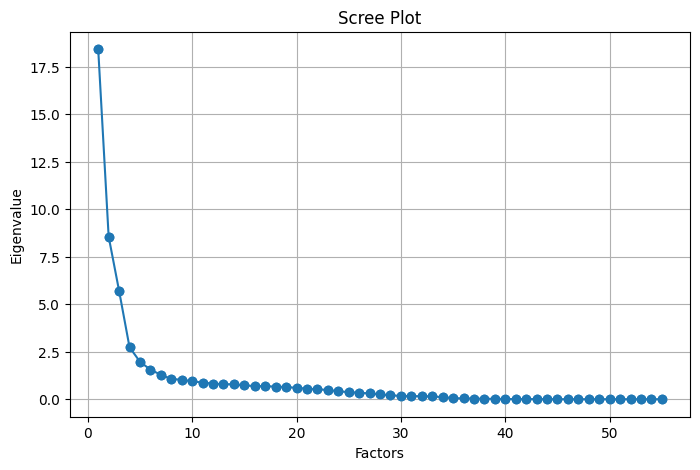

In [30]:
# ==============================
# 3. 요인 개수 판단
# ==============================
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# 최대 요인 개수 = 변수 개수
fa = FactorAnalyzer(n_factors=standardized_X.shape[1], rotation=None)
fa.fit(standardized_X)

# 고유값 확인
ev, v = fa.get_eigenvalues()
print("Eigenvalues:", ev)

# Scree plot
plt.figure(figsize=(8,5))
plt.scatter(range(1, standardized_X.shape[1]+1), ev)
plt.plot(range(1, standardized_X.shape[1]+1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [40]:
# ==============================
# 4. 요인분석 수행 (예: n_factors=3)
# ==============================
fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(X_validation_filtered)

# 요인적재량
loadings = pd.DataFrame(fa.loadings_, index=X_validation_filtered.columns)
print("Factor Loadings:\n", loadings)

# 공통성
communalities = pd.DataFrame(fa.get_communalities(), index=X_validation_filtered.columns, columns=["Communality"])
print(communalities)


Factor Loadings:
                                         0         1         2
industry_code                    0.217720  0.020815 -0.936507
total_sales_amount               0.956586  0.146500  0.113012
weekday_sales_amount             0.932445  0.153189  0.165242
weekend_sales_amount             0.973426  0.132644  0.023883
lunch_sales_ratio               -0.270519 -0.188402  0.719268
dinner_sales_ratio              -0.142586  0.256414  0.817348
transaction_count                0.940408  0.109832 -0.219980
weekday_transaction_count        0.955599  0.120537 -0.156853
weekend_transaction_count        0.894928  0.094545 -0.296566
mom_growth_rate                  0.548618  0.507868 -0.049344
yoy_growth_rate                  0.500362  0.181492 -0.121835
sales_cv                        -0.142821 -0.894479 -0.047763
avg_transaction_value           -0.128537  0.397260  0.588836
cash_payment_ratio              -0.329157 -0.615720  0.473220
revisit_customer_sales_ratio     0.143960  0.842123 

c:\Coding\PYTHON\FA\saey\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [41]:
# ==============================
# 4. 요인분석 수행 (예: n_factors=5)
# ==============================
fa2 = FactorAnalyzer(n_factors=5, rotation="varimax")
fa2.fit(X_validation_filtered)

# 요인적재량
loadings2 = pd.DataFrame(fa2.loadings_, index=X_validation_filtered.columns)
print("Factor Loadings:\n", loadings2)

# 공통성
communalities2 = pd.DataFrame(fa2.get_communalities(), index=X_validation_filtered.columns, columns=["Communality"])
print(communalities2)


Factor Loadings:
                                         0         1         2         3  \
industry_code                    0.115913  0.022126 -0.963952  0.071975   
total_sales_amount               0.971715  0.173533  0.048349  0.133572   
weekday_sales_amount             0.961154  0.193861  0.102910  0.108686   
weekend_sales_amount             0.966283  0.135488 -0.042103  0.172866   
lunch_sales_ratio               -0.133668 -0.125415  0.763165 -0.244946   
dinner_sales_ratio              -0.052895  0.246987  0.846989 -0.058427   
transaction_count                0.882620  0.102497 -0.294053  0.242379   
weekday_transaction_count        0.911502  0.130530 -0.233274  0.222616   
weekend_transaction_count        0.821598  0.064586 -0.366103  0.261682   
mom_growth_rate                  0.420481  0.359258 -0.101501  0.457957   
yoy_growth_rate                  0.358462 -0.012274 -0.175246  0.492473   
sales_cv                        -0.110122 -0.882422 -0.030319 -0.132871   
avg_tra

c:\Coding\PYTHON\FA\saey\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


결론부터 말씀드리면, 5개 요인 분석 결과(두 번째 결과)가 3개 요인 모델보다 훨씬 더 유의미하고 풍부한 인사이트를 제공합니다.

두 모델을 비교하는 핵심 기준은 **설명력(Communality)**과 **해석 가능성(Interpretability)**입니다. 5요인 모델은 이 두 가지 측면에서 명백한 우위를 보입니다.

비교 분석: 3요인 모델 vs. 5요인 모델
1. 설명력 (Communality)
요인 분석의 목적은 원본 변수들이 가진 정보를 최대한 보존하면서 요약하는 것입니다. 공통성(Communality)은 추출된 요인들이 각 변수를 얼마나 잘 설명하는지 보여주는 지표입니다.

3요인 모델의 한계: 3요인 모델에서는 여러 변수의 공통성 값이 낮게 나타났습니다. 이는 3개의 요인만으로는 해당 변수들의 특성을 충분히 설명하지 못한다는 의미입니다.

yoy_growth_rate (전년 대비 성장률): 공통성 = 0.298 (설명력 매우 낮음)

gas_usage_m3 (가스 사용량): 공통성 = 0.418 (설명력 낮음)

electricity_usage_kwh (전기 사용량): 공통성 = 0.434 (설명력 낮음)

water_usage_ton (수도 사용량): 공통성 = 0.442 (설명력 낮음)

5요인 모델의 개선: 5요인 모델에서는 위 변수들의 공통성이 크게 향상되었습니다. 이는 새로 추가된 요인(Factor 3, 4)이 기존 모델이 놓치고 있던 정보를 성공적으로 포착했음을 의미합니다.

yoy_growth_rate: 0.298 → 0.617 (설명력 대폭 향상)

gas_usage_m3: 0.418 → 0.604 (설명력 향상)

electricity_usage_kwh: 0.434 → 0.870 (설명력 대폭 향상)

water_usage_ton: 0.442 → 0.805 (설명력 대폭 향상)

2. 해석 가능성 및 인사이트의 질
요인은 명확하게 구분되고 의미를 부여할 수 있을 때 가치가 있습니다.

3요인 모델의 모호성:

Factor 2는 "F&B 특성"을 나타내지만, food_waste_kg_per_day (음식물 쓰레기), gas_usage_m3 (가스 사용량) 같은 운영/자원 사용 변수와 lunch_sales_ratio (점심 매출 비율) 같은 매출 패턴 변수가 혼재되어 있었습니다. 개념적으로 100% 깔끔하게 분리되지 않았습니다.

5요인 모델의 명확성 (개념 분리):

유틸리티 요인의 분리 (Factor 3): 5요인 모델에서는 electricity_usage_kwh, water_usage_ton, gas_usage_m3 등 유틸리티 관련 변수들이 Factor 3으로 명확하게 분리되었습니다. 이는 "사업 규모"나 "F&B 특성"과는 다른 **"운영 강도" 또는 "자원 소모"**라는 새로운 인사이트를 제공합니다.

성장성 요인의 발견: 3요인 모델에서 설명력이 낮았던 성장률 변수(yoy_growth_rate, mom_growth_rate)가 5요인 모델의 Factor 3과 Factor 4에 나뉘어 적재되면서, 성장성이라는 차원이 분석에 포함되기 시작했습니다.

결제 방식 요인의 분리 (Factor 4): Factor 4는 cash_payment_ratio_detail, card_payment_ratio_detail 등 세부 결제 방식 변수들을 분리해냈습니다. 이는 재무적 특성을 더 세분화하여 볼 수 있게 합니다.

최종 결론
3요인 모델은 데이터를 지나치게 단순화하여 중요한 정보(특히 유틸리티 사용량과 성장성)를 놓치고 있었습니다. 반면 5요인 모델은 통계적 설명력이 높을 뿐만 아니라, 각 요인이 더 명확하고 논리적인 그룹으로 분리되어 비즈니스적으로 더 깊이 있는 해석을 가능하게 합니다.

따라서 분석 목적상 5요인 모델을 선택하는 것이 훨씬 더 바람직합니다.

네, 5요인 모델의 각 요인에 대해 상세하게 설명해 드리겠습니다. 이전 3요인 모델보다 개념들이 명확하게 분리되어 더 구체적인 해석이 가능합니다.

Factor 0: 사업 규모 및 매출 볼륨 요인
이 요인은 가게의 전반적인 재무적 크기와 활동성을 나타냅니다. 요인 분석에서 가장 기본이 되는 축으로, 매출액이 크면 관련 비용도 함께 증가하는 경향을 보여줍니다.

주요 변수 (높은 양의 적재량):

total_sales_amount (총매출액), weekday_sales_amount, weekend_sales_amount (주중/주말 매출액): 0.96~0.97

cost_of_goods_sold (매출 원가), total_salary (총급여), rent_expense (임차료): 0.96~0.97

transaction_count (총 거래 건수): 0.88

operating_profit (영업 이익): 0.94

avg_account_balance (평균 계좌 잔고): 0.95

해석:

이 요인 점수가 높은 사업체는 매출액, 인건비, 임차료 등 재무제표 상의 절대적인 숫자가 큰 대형 사업체입니다.

Factor 1: 경영 효율성 및 재무 안정성 요인
이 요인은 사업체가 얼마나 안정적이고 효율적으로 운영되는지를 평가합니다. 수익성, 고객 충성도, 운영 안정성 등 내실을 보여주는 지표들로 구성됩니다.

주요 변수 (높은 양의 적재량):

revisit_customer_sales_ratio (재방문 고객 매출 비율): 0.89

operating_profit_ratio (영업 이익률): 0.79

customer_review_avg_rating (고객 리뷰 평균 평점): 0.73

energy_eff_appliance_ratio (에너지 효율 기기 비율): 0.70

주요 변수 (높은 음의 적재량):

sales_cv (매출 변동성): -0.88 (음의 값이므로 변동성이 낮음, 즉 안정적임)

new_customer_ratio (신규 고객 비율): -0.85 (신규 고객 비율이 낮다는 것은 기존 고객 비중이 높음을 의미)

cogs_ratio (매출 원가 비율): -0.67 (원가 비율이 낮음, 즉 효율적임)

해석:

이 요인 점수가 높은 사업체는 수익성이 좋고, 매출이 안정적이며, 고객 충성도(재방문, 리뷰 평점)가 높은 '내실 있는 우량 기업' 특성을 보입니다.

Factor 2: 업종 특성 및 F&B 패턴 요인
이 요인은 식음료(F&B) 업종의 고유한 판매 패턴을 명확하게 구분합니다. 식사 시간대 매출 비중과 객단가 등이 핵심입니다.

주요 변수 (높은 양의 적재량):

dinner_sales_ratio (저녁 매출 비율): 0.85

lunch_sales_ratio (점심 매출 비율): 0.76

food_waste_kg_per_day (일평균 음식물 쓰레기): 0.71

avg_transaction_value (평균 거래 금액/객단가): 0.61

주요 변수 (높은 음의 적재량):

industry_code (산업 코드): -0.96

해석:

점심/저녁 매출 비중과 음식물 쓰레기 발생량이 높게 묶이는 것은 전형적인 식당의 특성입니다. industry_code가 강한 음의 값을 가지는 것은 이 요인이 특정 업종(F&B)을 다른 업종과 구분하는 강력한 기준임을 보여줍니다.

Factor 3: 유틸리티 소모 및 운영 강도 요인
이 요인은 3요인 모델에서는 명확히 드러나지 않았던 물리적 자원 소모량을 나타내는 차원입니다.

주요 변수 (높은 양의 적재량):

electricity_usage_kwh (전기 사용량): 0.82

electricity_bill_amount (전기 요금): 0.81

water_usage_ton (수도 사용량): 0.79

gas_usage_m3 (가스 사용량): 0.55

food_waste_kg_per_day (음식물 쓰레기): 0.59

해석:

전기, 수도, 가스 등 유틸리티 사용량이 많은 사업장의 특성을 보여줍니다. 이는 사업 규모(Factor 0)와는 별개로, 운영 과정에서 자원을 집중적으로 사용하는 정도, 즉 **운영 강도(Operational Intensity)**를 나타냅니다.

Factor 4: 상세 결제 방식 및 성장성 요인
이 요인은 세부적인 결제 방식과 현금 흐름 특성, 그리고 성장성 지표가 결합된 형태를 보입니다.

주요 변수 (높은 양의 적재량):

card_payment_ratio_detail (카드 결제 비율 상세): 0.72

weighted_avg_cash_period (가중 평균 현금 보유 기간): 0.70

yoy_growth_rate (전년 대비 성장률): 0.46 (중간 정도의 적재량)

주요 변수 (높은 음의 적재량):

cash_payment_ratio_detail (현금 결제 비율 상세): -0.71

해석:

신용카드 결제 비중이 높은 현대적인 결제 시스템을 갖춘 특성을 나타냅니다. 또한 성장률 변수들이 이 요인에 일부 영향을 미치는 것으로 보아, 성장하는 기업의 현금 흐름 특성을 반영할 가능성이 있습니다.

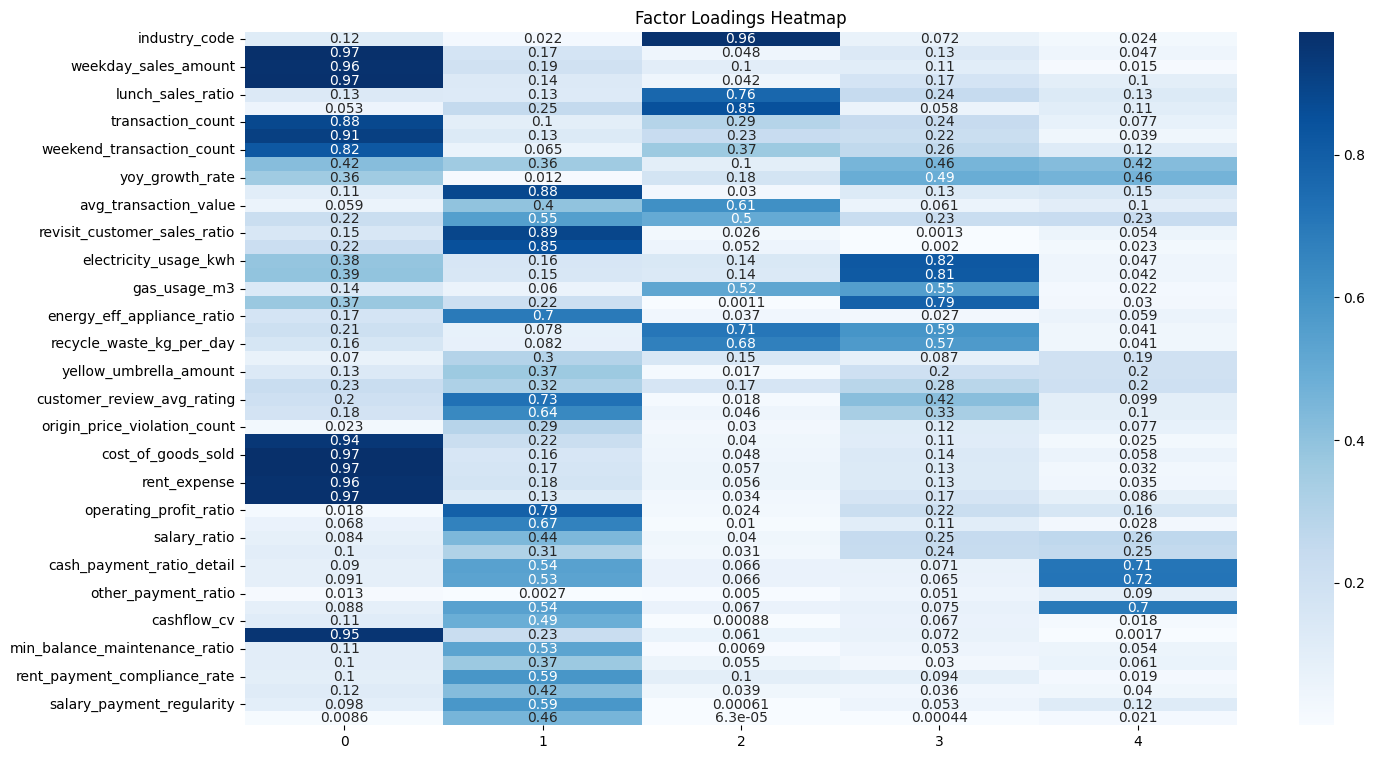

In [42]:
# ==============================
# 5. 요인 적재량 시각화
# ==============================
import seaborn as sns

plt.figure(figsize=(16,9))
sns.heatmap(abs(loadings2), annot=True, cmap="Blues")
plt.title("Factor Loadings Heatmap")
plt.show()

Factor Scores Head:
    Factor1   Factor2   Factor3   Factor4   Factor5
0 -0.374371 -0.613045 -0.101402  0.722993  0.063909
1 -0.517401 -0.743187 -0.036935  0.602932  0.773981
2  0.025258 -0.940031 -0.254189  0.258016  0.102072
3 -0.452460 -0.445974 -0.005172  0.072534  1.300066
4 -0.500041 -0.541330  0.021323  0.383073  3.011483


c:\Coding\PYTHON\FA\saey\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


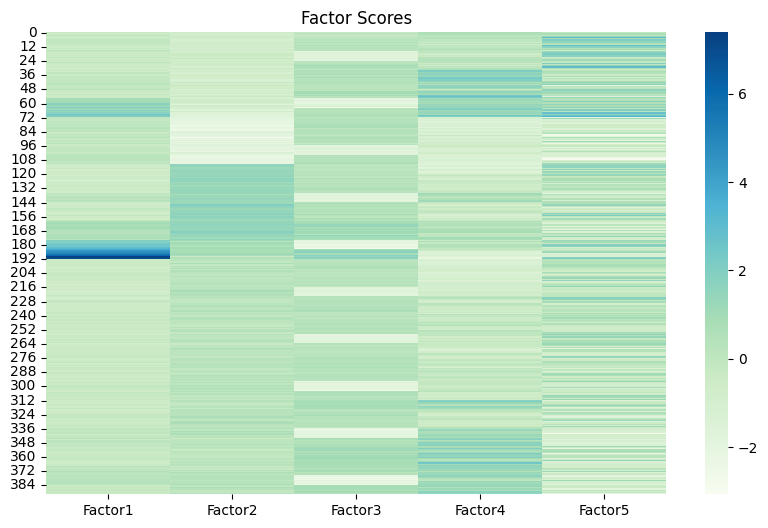

In [44]:
# ==============================
# 6. 요인 점수 계산 및 확인
# ==============================

# 요인 점수 계산
factor_scores2 = pd.DataFrame(
    fa2.transform(X_validation_filtered),
    columns=[f"Factor{i+1}" for i in range(fa2.n_factors)],
    index=X_validation_filtered.index
)

# [추가] 계산된 요인 점수 수치 출력 (상위 5개 행)
print("Factor Scores Head:")
print(factor_scores2.head())

# 시각화 코드
plt.figure(figsize=(10,6))
sns.heatmap(factor_scores2, cmap="GnBu")
plt.title("Factor Scores")
plt.show()

요인 점수(Factor Score)는 각각의 데이터 샘플(행)이 이전에 분석한 각 요인(Factor)의 특성을 얼마나 많이 가지고 있는지를 나타내는 종합 점수입니다.

이해하기 쉽게 비유하자면, 여러 과목(원본 변수)의 성적을 바탕으로 "학업 성취도"라는 잠재 요인을 만들었다면, 각 학생의 "학업 성취도 점수"가 바로 요인 점수입니다.

요인 점수 해석 방법
요인 점수는 일반적으로 표준화되어 있어 평균이 0입니다.

점수가 0에 가까우면: 해당 요인에 대해 전체 평균 수준입니다.

점수가 양수(+)이면: 해당 요인의 특성을 평균보다 강하게 가지고 있습니다.

점수가 음수(-)이면: 해당 요인의 특성을 평균보다 약하게 가지고 있습니다. (또는 해당 요인의 반대 특성을 가집니다.)

실제 데이터 적용 예시
앞서 분석한 5요인 모델의 해석을 바탕으로 예시 데이터의 첫 번째 행(인덱스 0)을 해석해 보겠습니다.

데이터 행 0:
Factor1: -0.37 | Factor2: -0.61 | Factor3: -0.10 | Factor4: 0.72 | Factor5: 0.06

해석:

Factor1 (사업 규모): -0.37 (평균보다 규모가 약간 작음)

Factor2 (경영 효율성/안정성): -0.61 (평균보다 효율성/안정성이 낮음)

Factor3 (유틸리티 소모 강도): -0.10 (자원 소모량은 평균 수준임)

Factor4 (상세 결제 방식/성장성): 0.72 (카드 결제 비중이 높고 성장성이 평균보다 높음)

Factor5 (데이터에 따라 해석 필요): 0.06 (평균 수준임)

요인 점수의 활용
요인 점수는 복잡한 원본 변수들을 몇 개의 핵심 요인으로 요약한 결과이므로, 다음과 같은 분석에 매우 유용하게 사용됩니다.

데이터 축소: 수십 개의 변수 대신 5개의 요인 점수만 사용하여 모델을 단순화합니다.

군집 분석 (Clustering): 요인 점수를 이용해 비슷한 특성을 가진 그룹(예: "규모는 크지만 효율이 낮은 그룹", "규모는 작지만 효율이 높은 그룹")을 나눌 수 있습니다.

회귀 분석: 다중공선성(변수 간 높은 상관관계) 문제를 해결한 요인 점수를 독립 변수로 사용하여 특정 결과를 예측하는 모델을 만들 수 있습니다.

Explained variance ratio: [4.02885071e-01 1.41278154e-01 8.40451814e-02 5.64598759e-02
 3.66227213e-02 2.75496938e-02 1.86633840e-02 1.75408746e-02
 1.68066622e-02 1.50907170e-02 1.41128337e-02 1.40276926e-02
 1.34834103e-02 1.23513941e-02 1.20507650e-02 1.13715613e-02
 1.05928608e-02 1.04426259e-02 9.43181564e-03 9.18180309e-03
 8.47610912e-03 8.22315710e-03 7.86938761e-03 6.77621873e-03
 5.65419079e-03 4.75813925e-03 3.56770290e-03 3.40366566e-03
 3.27246494e-03 2.78451909e-03 2.27016695e-03 2.09961190e-03
 1.66941930e-03 1.42155120e-03 8.92321703e-04 7.13054710e-04
 6.46155579e-04 4.12768279e-04 3.23860203e-04 2.45052848e-04
 1.68585653e-04 1.60935165e-04 1.12530607e-04 5.72394931e-05
 2.16469593e-05 4.15773112e-06 1.77537620e-06 1.66466055e-06
 1.50569836e-06 1.34304042e-06]
Components (Loadings):
     industry_code  total_sales_amount  weekday_sales_amount  \
0        0.032683            0.254433              0.250343   
1        0.089329            0.109811              0.098692 

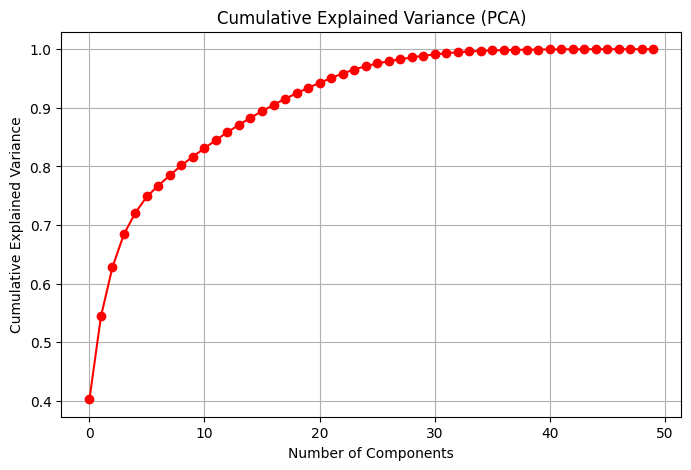

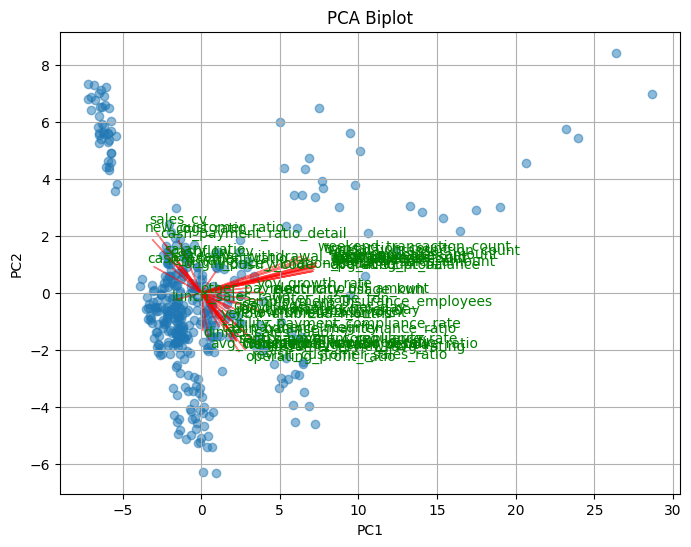

In [46]:
# ==============================
# 7. PCA 수행 (수정된 코드)
# ==============================
from sklearn.decomposition import PCA

# [수정] PCA에 사용할 데이터를 전처리가 완료된 X_validation_filtered로 변경
# pca_X = standardized_X.copy() # 원본 코드
pca_X = X_validation_filtered.copy() # 수정된 코드

# PCA 모델 생성 및 학습
pca = PCA()
pca.fit(pca_X)

# 주성분 결과 출력
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Components (Loadings):\n", pd.DataFrame(pca.components_, columns=pca_X.columns))

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='red')
plt.title("Cumulative Explained Variance (PCA)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Biplot 함수 (함수 정의는 수정할 필요 없음)
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    plt.figure(figsize=(8,6))
    plt.scatter(xs, ys, alpha=0.5)
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i,0]*max(xs), coeff[i,1]*max(ys),
                  color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*max(xs)*1.15, coeff[i,1]*max(ys)*1.15, "Var"+str(i+1), color='g')
        else:
            plt.text(coeff[i,0]*max(xs)*1.15, coeff[i,1]*max(ys)*1.15, labels[i], color='g')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Biplot")
    plt.grid(True)
    plt.show()

# Biplot 호출 시에도 수정된 pca_X와 해당 열 이름을 사용
biplot(pca.transform(pca_X), pca.components_.T, labels=pca_X.columns)